In [1]:
import csv
f1 = open ("C:\Users\Anmol Mishra\CC3DWorkspace\Phase 2\Control\Demo_cc3d_05_20_2016_19_05_50\data.csv" , "rb")
data = csv.reader(f1)

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [3]:
newdata = []
for line in data:
    newdata.append(line)
finalVolume = int(newdata[-1][3])

In [ ]:
for i in range(len(newdata)):
    if (int(i[3])>finalVolume):
        finalVolume = int(i[3])

In [4]:
tend = 0
for i in newdata:
    if (int(i[3]) == finalVolume) :
        tend = int(i[0])
        break

In [5]:
tend

1070

In [6]:
freespace = []
for i in range(len(newdata)):
    if (int(newdata[i][0]) != int(newdata[i-1][0])):
        freespace.append(finalVolume - int(newdata[i][3]))

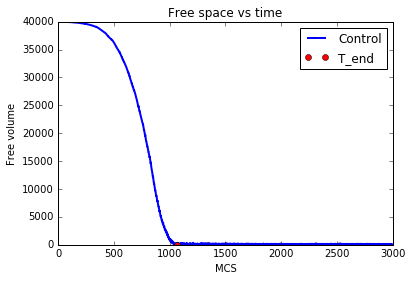

In [7]:
plt.plot(freespace , linewidth = 2 , label = "Control")
plt.plot( [tend], freespace[tend] , 'ro' , label = "T_end")
plt.title("Free space vs time")
plt.xlabel("MCS")
plt.ylabel("Free volume")
plt.legend()
plt.savefig("Free space Control")

In [8]:
noofcells = []
count =0
for i in range(len(newdata)):
    if (int(newdata[i][0]) == int(newdata[i-1][0])):
        count = count+1
    else :
        noofcells.append(count+1)
        count=0

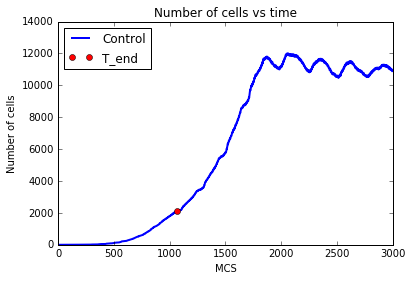

In [9]:
plt.plot( noofcells, linewidth = 2 , label = "Control")
plt.plot( [tend], noofcells[tend] , 'ro' , label = "T_end")
plt.title("Number of cells vs time")
plt.xlabel("MCS")
plt.ylabel("Number of cells")
plt.legend( loc = 2)
plt.savefig("Number of Cells Control")

In [10]:
volume = []
varvolume = []
for i in range(len(newdata)):
    if (int(newdata[i][0]) == int(newdata[i-1][0]) and i != 0):
        volume.append(int(newdata[i-1][2]))
    else :
        volume.append(int(newdata[i-1][2]))
        npvolume = np.array(volume)
        varvolume.append(npvolume.std())
        volume = []
npvolume = np.array(volume)
varvolume.append(npvolume.std())
del varvolume[0]

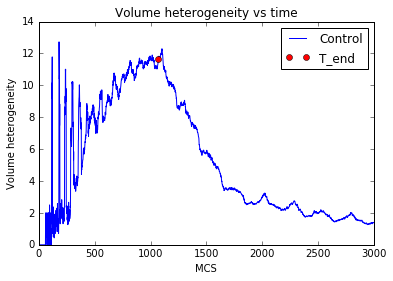

In [11]:
plt.plot(varvolume, label = "Control")
plt.plot( [tend], varvolume[tend] , 'ro' , label = "T_end")
plt.title("Volume heterogeneity vs time")
plt.xlabel("MCS")
plt.ylabel("Volume heterogeneity")
plt.legend(loc = 0)
plt.savefig("Volume Heterogeneity Control")

In [12]:
area = []
vararea = []
for i in range(len(newdata)):
    if (int(newdata[i][0]) == int(newdata[i-1][0]) and i != 0):
        area.append(float(newdata[i-1][4]))
    else :
        area.append(float(newdata[i-1][4]))
        nparea = np.array(area)
        vararea.append(nparea.std())
        area = []
nparea = np.array(area)
vararea.append(nparea.std())
del vararea[0]

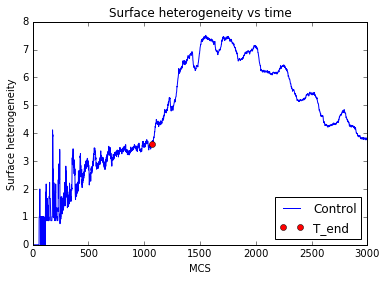

In [13]:
plt.plot(vararea, label = "Control")
plt.plot( [tend], vararea[tend] , 'ro' , label = "T_end")
plt.title("Surface heterogeneity vs time")
plt.xlabel("MCS")
plt.ylabel("Surface heterogeneity")
plt.legend(loc = 4)
plt.savefig("Surface Heterogeneity Control")